In [1]:
import numpy as np
import random

## Даны матрицы A B C. Найти: А+В, В-А, A*C, A*B*C 
### Реализация на классе

In [146]:
class MatrixOperations:
    '''
    A class to represent a matrix and perform operations on matrices like A + B, B - A, AC, AB*C.
    The matrix is set manually by input.

    Attributes:
        rows (int): The number of rows in the matrix.
        cols (int): The number of columns in the matrix.
    '''

    def __init__(self, matrix: list):
        """
        Initializes a matrix attributes.

        Args:
            rows (int): The number of rows in the matrix.
            cols (int): The number of columns in the matrix.
        """
        self.matrix = matrix
        self.rows = len(matrix)
        self.cols = len(matrix[0]) if self.rows > 0 else 0
        
    def __str__(self) -> str:
        """
        Returns a string representation of the matrix.

        Returns:
            str: A string representation of the matrix.
        """
        return '\n'.join([' '.join(map(str, row)) for row in self.matrix])
    
    def shape(self) -> tuple:
        """
        Returns the shape of the matrix.

        Returns:
            tuple: A tuple containing the number of rows and columns in the matrix.
        """
        rows = len(self.matrix)
        cols = len(self.matrix[0]) if rows > 0 else 1
        return rows, cols
    
    def sum_of_matrix(self, other: object) -> list:
        """
        Returns the sum of two matrices.

        Args:
            other (object of class Matrix): The other matrix to be added.

        Returns:
            Matrix (list): The sum of the two matrices.
        """
        result = []

        if self.shape() != other.shape():
            print("Matrices must have the same shape")
        else:
            for i in range(self.rows):
                temp = []
                for j in range(self.cols):
                    temp.append(self.matrix[i][j] + other.matrix[i][j])
                result.append(temp)
            return result
        
    def subtr_of_matrix(self, other: object) -> list:
        """
        Returns the subtraction of two matrices.

        Args:
            other (object of class Matrix): The other matrix to be added.

        Returns:
            Matrix (list): The resulting matrix of the subtraction of two matrices.
        """
        result = []

        if self.shape() != other.shape():
            print("Matrices must have the same shape")
        else:
            for i in range(self.rows):
                temp = []
                for j in range(self.cols):
                    temp.append(self.matrix[i][j] - other.matrix[i][j])
                result.append(temp)
            return result

    def mult_matrix(self, other: object) -> list:
        """
        Returns the multiply of two matrices.

        Args:
            other (object of class Matrix): The other matrix to be added.

        Returns:
            Matrix (list): The resulting matrix of the multiplying of two matrices.
        """
        result = []
        if len(self.matrix[0]) != len(other.matrix):
            print("Number of columns in the first matrix must be equal to the number of rows in the second matrix")
        else: 
            for i in range(len(self.matrix)):
                temp = []
                for j in range(len(other.matrix[0])):
                    sum = 0
                    for k in range(len(self.matrix[0])):
                        sum += self.matrix[i][k] * other.matrix[k][j]
                    temp.append(sum)
                result.append(temp)
            return result
                

### Инициализация и заполнение матриц 
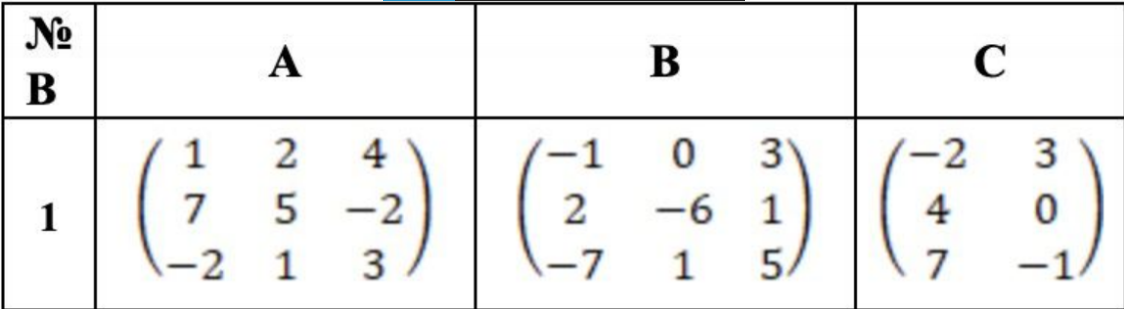

In [147]:
A = MatrixOperations([[1, 2, 4], [7, 5, -2], [-2, 1, 3]])
B = MatrixOperations([[-1, 0, 3], [2, -6, 1], [-7, 1, 5]])
C = MatrixOperations([[-2, 3], [4, 0], [7, -1]])

In [138]:
print(A)

1 2 4
7 5 -2
-2 1 3


In [139]:
print(C)

-2 3
4 0
7 -1


### Сумма матриц A + B

In [140]:
sum_matrix = A.sum_of_matrix(B)
for row in sum_matrix:
    print(row)

[0, 2, 7]
[9, -1, -1]
[-9, 2, 8]


### Вычитание матриц: B - A

In [141]:
subtr_matrix = B.subtr_of_matrix(A)
for row in subtr_matrix:
    print(row)

[-2, -2, -1]
[-5, -11, 3]
[-5, 0, 2]


### Произведение матриц: A*C

In [150]:
mult_result = A.mult_matrix(C)
for row in mult_result:
    print(row)

[34, -1]
[-8, 23]
[29, -9]


### Произведение матриц: AB*C

In [153]:
result_AB = A.mult_matrix(B)
if result_AB:
    result_AB_matrix = MatrixOperations([[-25, -8, 25], [17, -32, 16], [-17, -3, 10]])
    result_AB_matrix.matrix = result_AB
    result_ABC_mult = result_AB_matrix.mult_matrix(C)
    if result_ABC_mult:
        for row in result_ABC_mult:
            print(row)

[193, -100]
[-50, 35]
[92, -61]


## Матричные операции с помощью numpy
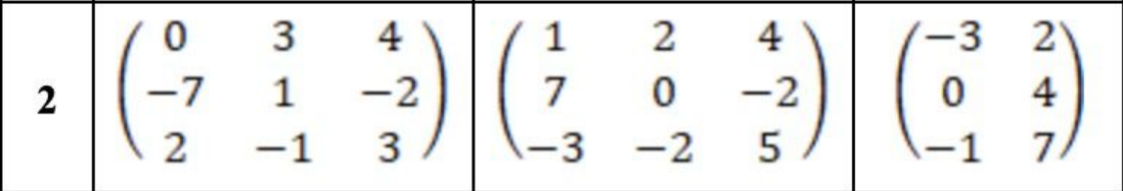

In [159]:
A = np.array([[0, 3, 4], [-7, 1, -2], [2, -1, 3]])
B = np.array([[1, 2, 4], [7, 0, -2], [-3, -2, 5]])
C = np.array([[-3, 2], [0, 4], [-1, 7]])

In [163]:
print(f"Сложение матриц A + B:\n{np.add(A, B)}")

Сложение матриц A + B:
[[ 1  5  8]
 [ 0  1 -4]
 [-1 -3  8]]


In [164]:
print(f"Вычитание матриц B - A:\n{np.subtract(B, A)}")

Вычитание матриц B - A:
[[ 1 -1  0]
 [14 -1  0]
 [-5 -1  2]]


In [165]:
print(f"Произведение матриц A*C:\n{np.dot(A, C)}")

Произведение матриц A*C:
[[ -4  40]
 [ 23 -24]
 [ -9  21]]


In [166]:
print(f"Произведение матриц A*B*C:\n{np.dot(np.dot(A, B), C)}")

Произведение матриц A*B*C:
[[ -41   84]
 [  22 -308]
 [  17  139]]


## Необходимо реализовать на python (+numpy) алгоритм матричной свертки (3x3) для представленного изображения.

In [167]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Принцип реализации свертки с уменьшением размерности

In [181]:
matrix = np.array([[3, 3, 2, 1, 0], 
                  [0, 0, 1, 3, 1], 
                  [3, 1, 2, 2, 3], 
                  [2, 0, 0, 2, 2], 
                  [2, 0, 0, 0, 1]])

kernel = np.array([[12, 12, 17],
                   [10, 17, 19],
                   [9, 6, 14]])

def conv(matrix: list, kernel: list) -> list:
    '''
    Realizes convolution to the matrix. 

    Args:
    matrix(list): Input matrix for applying convolution to reduce the shape.
    kernel(list): Input kernel matrix to filter some matrix.
    '''
    matrix_height, matrix_width = matrix.shape
    kernel_shape = kernel.shape[0]

    filtered_height = matrix_height - kernel_shape + 1
    filtered_width = matrix_width - kernel_shape + 1
    filtered_matrix = np.zeros((filtered_height, filtered_width))
    
    for i in np.arange(filtered_height):
        for j in np.arange(filtered_width):
            filtered_matrix[i, j] = np.sum(matrix[i:i + kernel_shape, j:j + kernel_shape] * kernel)
    return filtered_matrix

conv(matrix, kernel)

array([[186., 200., 188.],
       [120., 173., 216.],
       [120., 108., 185.]])

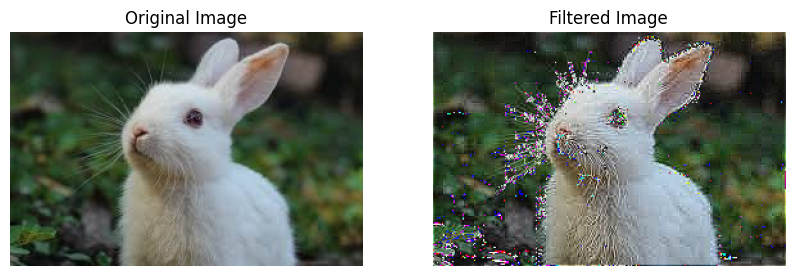

In [173]:
image = mpimg.imread('img_0.jpg')


kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])


def apply_convolution(image, kernel_matrix):
    image_shape = image.shape
    kernel_size = kernel_matrix.shape[0]
    filtered_image = np.zeros_like(image)
    padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant')
    
    for i in range(image_shape[0]):
        for j in range(image_shape[1]):
            for k in range(image_shape[2]):
                filtered_image[i, j, k] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size, k] * kernel_matrix)
                
    return filtered_image


output_image = apply_convolution(image, kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Filtered Image')
plt.axis('off')

plt.show()